# Abstract
#### Setting

        1. 1차 정제 데이터인 Dtx 원본 설문 데이터 사용


#### Method

        1. Baseline
        2. Ont-hot


#### Result
        사용 모델 : XGBoost
                    Precission : 0.3
                    recall : 0.25
                    f1_score : 0.2727272727272727
                    accuracy : 0.5471698113207547



In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib as plt

/Users/aidev_yyc_mac/opt/anaconda3/envs/yyc/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
df = pd.read_csv('../dataset/금연_dtx.csv')

In [4]:
df

,금연성공여부,성별,연령,흡연시작연령,담배종류,하루흡연량,FTND
0,0,1,52,25,1,3,8
1,0,1,32,17,1,4,7
2,1,1,41,21,1,2,0
3,1,1,60,18,1,2,6
4,1,1,28,19,4,2,2
...,...,...,...,...,...,...,...
1050,0,2,33,17,1,2,6
1051,0,2,24,20,5,2,3
1052,0,2,49,30,1,2,2
1053,1,2,55,30,1,3,5


In [37]:
df['FTND']

0       8
1       7
2       0
3       6
4       2
       ..
1050    6
1051    3
1052    2
1053    5
1054    4
Name: FTND, Length: 1055, dtype: int64

# One-hot encoding

In [5]:
smoke_kind = pd.get_dummies(df['담배종류'], prefix = '담배종류')
sex = pd.get_dummies(df['성별'], prefix = '성별')
FTND = pd.get_dummies(df['FTND'], prefix= 'FTND')

In [6]:
df = pd.concat([df,smoke_kind,sex,FTND],axis=1)
df = df.drop(['담배종류','성별','FTND'],axis=1)

In [7]:
df.rename(columns={'성별_1' : '남', '성별_2' : '여'},inplace=True)

In [8]:
df.to_csv('../dataset/DTX_data_002.csv',index=False)

In [ ]:
'../dataset/DTX_data_002.csv'

In [42]:
X = df.drop(['금연성공여부'],axis=1)
y = df['금연성공여부']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, shuffle=True,  random_state=34)

In [43]:
params = {

}

In [10]:
model = XGBClassifier(**params)

xgb_model = model.fit(X_train, y_train)

NameError: name 'params' is not defined

In [45]:
y_pre = xgb_model.predict(X_valid)
y_pred_probs = xgb_model.predict_proba(X_valid)[:,1]

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
p = precision_score(y_valid, y_pre)
print('Precission :' , p)
r = recall_score(y_valid, y_pre)
print('recall :',r)
f1 = f1_score(y_valid, y_pre)
print('f1_score :',f1)
accuracy = accuracy_score( y_valid, y_pre)
print('accuracy :' ,accuracy)

Precission : 0.3
recall : 0.25
f1_score : 0.2727272727272727
accuracy : 0.5471698113207547


NameError: name 'xgb_model' is not defined

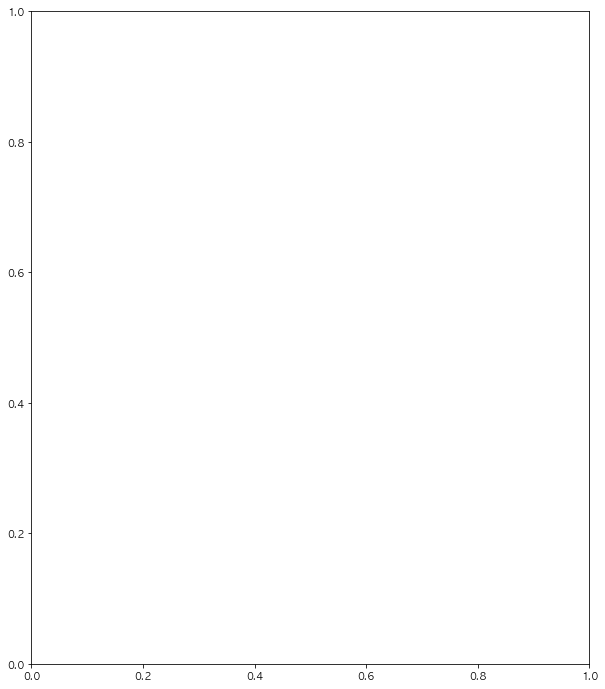

In [9]:
from matplotlib import pyplot as plt
from matplotlib import rc
from xgboost import plot_importance


rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)